In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from copy import copy

In [2]:
datadir = '/scratch/rfischer/Kooi_data/data_output/'

In [3]:
region = 'EqPac'
mortality = 0.39
runtime = 20                  # [days]
dt = 30                       # [seconds]
outputdt = 12                 # [hours]
mixing = ['no','fixed']

In [4]:
ds_0 = xr.open_dataset(datadir+'regional_'+region+'_bfadv_Jan_2004_0'+str(mortality)[2:]+'mort_'+mixing[0]+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
ds_1 = xr.open_dataset(datadir+'regional_'+region+'_bfadv_Jan_2004_0'+str(mortality)[2:]+'mort_'+mixing[1]+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')

In [6]:
dslist = [ds_0, ds_1]

In [7]:
mixing_cmap = ['seagreen','orange']

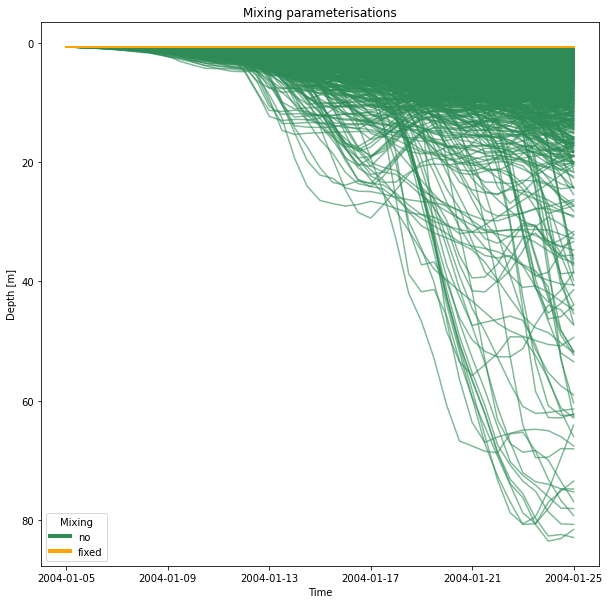

In [9]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()

for i in range(len(mixing)):
    ax.plot(dslist[i]['time'].T, dslist[i]['z'].T, c=mixing_cmap[i], alpha=0.6, label = mixing[i])

ax.set_title('Mixing parameterisations')
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Time')

custom_lines = [Line2D([0], [0], color=mixing_cmap[0], lw=4),
                Line2D([0], [0], color=mixing_cmap[1], lw=4)]

ax.invert_yaxis()
ax.legend(custom_lines, [mixing[0], mixing[1]], title='Mixing')
plt.show()

Text(0.5, 0, 'Time')

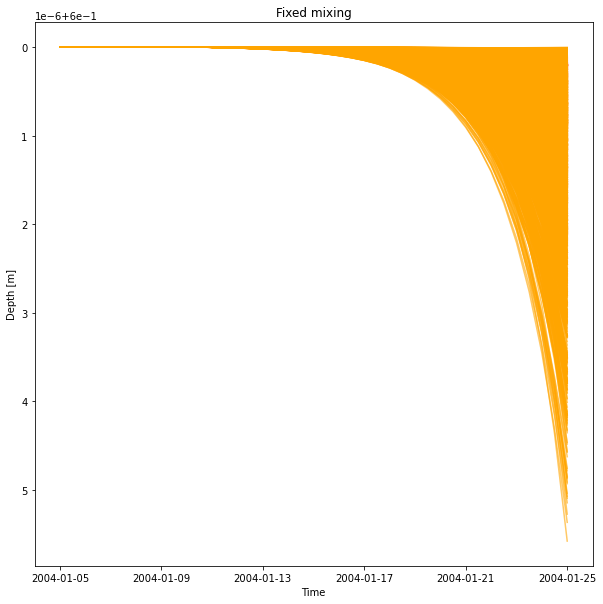

In [13]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()

ax.plot(dslist[1]['time'].T, dslist[1]['z'].T, c=mixing_cmap[1], alpha=0.6, label = mixing[1])
ax.invert_yaxis()

ax.set_title('Fixed mixing')
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Time')
